In [1]:
# data analysis and modifying 
import pandas as pd
import numpy as np
import random
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from tensorflow import keras

# evaluation
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score


Using TensorFlow backend.


In [2]:
# Import DataFrame
beers_df = pd.read_csv('Data/beers.csv')
# Delete useless columns 
beers_df = beers_df.drop(['UserId', 'Name'], axis=1)
# print(beers_df.info())
# PitchRate column has less than half filled records, so I delete it
beers_df = beers_df.drop(['PitchRate'], axis=1)
print(beers_df.head())


   Style     OG     FG   ABV    IBU  Color  BoilTime  BoilGravity  Efficiency
0  Stout  1.069  1.007  8.12   0.00  30.48        60          NaN        75.0
1    Ale  1.064  1.012  6.80   9.36   9.85        60        1.132        35.0
2  Stout  1.061  1.015  6.08  28.31  35.83        60        1.044        83.0
3    Ale  1.053  1.012  5.44  46.48   5.77        60        1.033        70.0
4  Lager  1.053  1.017  4.64  42.29   4.22        90        1.039        77.0


In [ ]:
beers_df.info()

In [ ]:
beers_df.describe()

In [ ]:
sns.heatmap(beers_df.corr(), annot=True)
plt.tight_layout()

In [ ]:
beers_df[['ABV', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['OG', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['FG', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['IBU', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['Color', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['BoilTime', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['BoilGravity', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
beers_df[['Efficiency', 'Style']].groupby(['Style'], as_index=False).mean().sort_values(by='Style', ascending=False)

In [ ]:
# ABV histogram
g = sns.FacetGrid(beers_df, col='Style', height=6, aspect=2)
g.map(plt.hist, 'OG', bins=20)

In [ ]:
# show Box Plots
sns.boxplot(x='Style', y='ABV', data=beers_df)

In [ ]:
# show Box Plots
sns.boxplot(x='Style', y='Color', data=beers_df)
# sns.boxplot(x='Style', y='Color', data=beers_df.where(beers_df['Color'] < 100))


In [ ]:
# show Box Plots
sns.boxplot(x='Style', y='OG', data=beers_df)
# sns.boxplot(x='Style', y='OG', data=beers_df.where(beers_df['OG'] < 2))

In [ ]:
# show Box Plots
sns.boxplot(x='Style', y='FG', data=beers_df)
# sns.boxplot(x='Style', y='FG', data=beers_df.where(beers_df['FG'] < 2))

In [ ]:
# show Box Plots
sns.boxplot(x='Style', y='IBU', data=beers_df)
# sns.boxplot(x='Style', y='IBU', data=beers_df.where(beers_df['IBU'] < 1000))

In [ ]:
sns.jointplot(x='ABV', y='IBU', data=beers_df, color='g')

In [ ]:
# splitting data into train and test sets
Y = beers_df['Style'].values
beers_df = beers_df.drop(['Style'], axis=1)
X = beers_df.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [4]:
# one hot encode categorials
categoricals = list(['Style'])
encoder = OneHotEncoder(sparse=False)
encoded_train = encoder.fit_transform(y_train.reshape(-1, 1))
encoded_test = encoder.fit_transform(y_test.reshape(-1, 1))

y_train_encoded = pd.DataFrame(encoded_train, columns=np.hstack(encoder.categories_))
y_test_encoded = pd.DataFrame(encoded_test, columns=np.hstack(encoder.categories_))

In [ ]:
y_train_encoded

In [5]:
# my way to get rid of outliers: turn their huge values into max bound ones
X_train = pd.DataFrame(X_train, columns=beers_df.columns.values)
X_train.loc[X_train["ABV"] >24. , ["ABV"]] = 24. 
X_train.loc[X_train["IBU"] >500. , ["IBU"]] = 500. 
X_train.loc[X_train["Color"] >40. , ["Color"]] = 40. 
X_train.loc[X_train["OG"] >1.5 , ["OG"]] = 1.5
X_train.loc[X_train["FG"] >1.16 , ["FG"]] = 1.16

In [6]:
X_test = pd.DataFrame(X_test, columns=beers_df.columns.values)
X_test.loc[X_test["ABV"] >24. , ["ABV"]] = 24. 
X_test.loc[X_test["IBU"] >500. , ["IBU"]] = 500. 
X_test.loc[X_test["Color"] >40. , ["Color"]] = 40.
X_test.loc[X_test["OG"] >1.5 , ["OG"]] = 1.5
X_test.loc[X_test["FG"] >1.16 , ["FG"]] = 1.16

In [7]:
# fill missing rows from BoilGravity colums with mean value from X_train set
boil_gravity_mean = np.mean(X_train['BoilGravity'])
boil_gravity_median = np.median(X_train['BoilGravity'])
X_train['BoilGravity'] = X_train['BoilGravity'].fillna(boil_gravity_mean)

In [8]:
# same here but ATTENTION: use mean val from train set not test set!!!
X_test = pd.DataFrame(X_test, columns=beers_df.columns.values)
X_test['BoilGravity'] = X_test['BoilGravity'].fillna(boil_gravity_mean)

In [9]:
# standard scaling data - scaler is fitted with train set values only
scaler_train = StandardScaler().fit(X_train)
X_train = scaler_train.transform(X_train)
X_test = scaler_train.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns=beers_df.columns.values)
X_test = pd.DataFrame(X_test, columns=beers_df.columns.values)
X_train.head()

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency
0,0.800436,0.761933,1.091849,1.804942,-0.304940,-0.364851,0.042653,-0.276232
1,-0.016178,-0.201350,0.051717,1.343685,1.290955,-0.364851,-0.152544,0.979800
2,-0.191166,-0.779320,0.114000,0.966341,-0.333818,-0.364851,-1.362766,-0.958078
3,-0.074507,-0.586663,0.120229,-0.152842,-0.293050,-0.364851,-0.308701,0.262067
4,-0.424485,-0.971976,-0.197416,1.689824,-0.471410,-0.364851,-0.542938,-0.096799


In [11]:
# model 
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.categorical_accuracy])

In [13]:
history = model.fit(X_train, y_train_encoded, batch_size=512, epochs=1024, callbacks = [keras.callbacks.TerminateOnNaN()])

Train on 30015 samples
Epoch 1/1024
30015/30015 [==============================] - 1s 27us/sample - loss: 1.5623 - categorical_accuracy: 0.3732
Epoch 2/1024
30015/30015 [==============================] - 1s 18us/sample - loss: 1.1584 - categorical_accuracy: 0.6005
Epoch 3/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 1.0611 - categorical_accuracy: 0.6249
Epoch 4/1024
30015/30015 [==============================] - 0s 16us/sample - loss: 1.0210 - categorical_accuracy: 0.6316
Epoch 5/1024
30015/30015 [==============================] - 1s 18us/sample - loss: 1.0020 - categorical_accuracy: 0.6328
Epoch 6/1024
30015/30015 [==============================] - 1s 20us/sample - loss: 0.9855 - categorical_accuracy: 0.6362
Epoch 7/1024
30015/30015 [==============================] - 1s 18us/sample - loss: 0.9712 - categorical_accuracy: 0.6415s - loss: 0.9651 - categorica
Epoch 8/1024
30015/30015 [==============================] - 1s 18us/sample - loss: 0.9654 - categoric

30015/30015 [==============================] - 1s 21us/sample - loss: 0.8744 - categorical_accuracy: 0.6701
Epoch 67/1024
30015/30015 [==============================] - 1s 19us/sample - loss: 0.8737 - categorical_accuracy: 0.6707
Epoch 68/1024
30015/30015 [==============================] - 1s 23us/sample - loss: 0.8726 - categorical_accuracy: 0.6716
Epoch 69/1024
30015/30015 [==============================] - 1s 19us/sample - loss: 0.8698 - categorical_accuracy: 0.6714
Epoch 70/1024
30015/30015 [==============================] - 1s 17us/sample - loss: 0.8729 - categorical_accuracy: 0.6705
Epoch 71/1024
30015/30015 [==============================] - 1s 18us/sample - loss: 0.8690 - categorical_accuracy: 0.6724
Epoch 72/1024
30015/30015 [==============================] - 1s 21us/sample - loss: 0.8723 - categorical_accuracy: 0.6699
Epoch 73/1024
30015/30015 [==============================] - 1s 20us/sample - loss: 0.8706 - categorical_accuracy: 0.6720
Epoch 74/1024
30015/30015 [===========

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8573 - categorical_accuracy: 0.6754
Epoch 133/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8544 - categorical_accuracy: 0.6761
Epoch 134/1024
30015/30015 [==============================] - 1s 17us/sample - loss: 0.8556 - categorical_accuracy: 0.6765
Epoch 135/1024
30015/30015 [==============================] - 1s 19us/sample - loss: 0.8545 - categorical_accuracy: 0.6753
Epoch 136/1024
30015/30015 [==============================] - 0s 17us/sample - loss: 0.8545 - categorical_accuracy: 0.6750
Epoch 137/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8529 - categorical_accuracy: 0.6771
Epoch 138/1024
30015/30015 [==============================] - 0s 16us/sample - loss: 0.8513 - categorical_accuracy: 0.6767
Epoch 139/1024
30015/30015 [==============================] - 0s 17us/sample - loss: 0.8535 - categorical_accuracy: 0.6762
Epoch 140/1024
30015/30015 [===

30015/30015 [==============================] - 1s 18us/sample - loss: 0.8447 - categorical_accuracy: 0.6809
Epoch 199/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8452 - categorical_accuracy: 0.6800
Epoch 200/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8456 - categorical_accuracy: 0.6780
Epoch 201/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8448 - categorical_accuracy: 0.6801
Epoch 202/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8452 - categorical_accuracy: 0.6788
Epoch 203/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8435 - categorical_accuracy: 0.6796
Epoch 204/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8431 - categorical_accuracy: 0.6791
Epoch 205/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8424 - categorical_accuracy: 0.6795
Epoch 206/1024
30015/30015 [===

30015/30015 [==============================] - 0s 16us/sample - loss: 0.8393 - categorical_accuracy: 0.6815
Epoch 265/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8406 - categorical_accuracy: 0.6818
Epoch 266/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8364 - categorical_accuracy: 0.6813
Epoch 267/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8370 - categorical_accuracy: 0.6798
Epoch 268/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8379 - categorical_accuracy: 0.6823
Epoch 269/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8362 - categorical_accuracy: 0.6828
Epoch 270/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8396 - categorical_accuracy: 0.6787
Epoch 271/1024
30015/30015 [==============================] - 0s 11us/sample - loss: 0.8380 - categorical_accuracy: 0.6817
Epoch 272/1024
30015/30015 [===

30015/30015 [==============================] - 0s 13us/sample - loss: 0.8326 - categorical_accuracy: 0.6829
Epoch 330/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8327 - categorical_accuracy: 0.6825
Epoch 331/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8342 - categorical_accuracy: 0.6812
Epoch 332/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8331 - categorical_accuracy: 0.6834
Epoch 333/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8301 - categorical_accuracy: 0.6834
Epoch 334/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8318 - categorical_accuracy: 0.6822s - loss: 0.8474 - categorical_accu
Epoch 335/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8310 - categorical_accuracy: 0.6829
Epoch 336/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8339 - categorical_accuracy: 0.6

30015/30015 [==============================] - 0s 13us/sample - loss: 0.8293 - categorical_accuracy: 0.6846
Epoch 395/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8290 - categorical_accuracy: 0.6829
Epoch 396/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8264 - categorical_accuracy: 0.6829
Epoch 397/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8281 - categorical_accuracy: 0.6843
Epoch 398/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8270 - categorical_accuracy: 0.6846
Epoch 399/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8297 - categorical_accuracy: 0.6849
Epoch 400/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8300 - categorical_accuracy: 0.6840
Epoch 401/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8296 - categorical_accuracy: 0.6837
Epoch 402/1024
30015/30015 [===

30015/30015 [==============================] - 1s 18us/sample - loss: 0.8264 - categorical_accuracy: 0.6858
Epoch 461/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8237 - categorical_accuracy: 0.6865
Epoch 462/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8232 - categorical_accuracy: 0.6858
Epoch 463/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8224 - categorical_accuracy: 0.6853
Epoch 464/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8253 - categorical_accuracy: 0.6868
Epoch 465/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8260 - categorical_accuracy: 0.6830
Epoch 466/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8260 - categorical_accuracy: 0.6850
Epoch 467/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8251 - categorical_accuracy: 0.6859
Epoch 468/1024
30015/30015 [===

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8217 - categorical_accuracy: 0.6883
Epoch 527/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8215 - categorical_accuracy: 0.6883
Epoch 528/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8232 - categorical_accuracy: 0.6872
Epoch 529/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8185 - categorical_accuracy: 0.6881
Epoch 530/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8212 - categorical_accuracy: 0.6867
Epoch 531/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8205 - categorical_accuracy: 0.6876
Epoch 532/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8231 - categorical_accuracy: 0.6876
Epoch 533/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8220 - categorical_accuracy: 0.6840
Epoch 534/1024
30015/30015 [===

30015/30015 [==============================] - 1s 17us/sample - loss: 0.8228 - categorical_accuracy: 0.6867
Epoch 593/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8207 - categorical_accuracy: 0.6882
Epoch 594/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8215 - categorical_accuracy: 0.6859
Epoch 595/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8191 - categorical_accuracy: 0.6870
Epoch 596/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8180 - categorical_accuracy: 0.6878
Epoch 597/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8214 - categorical_accuracy: 0.6861
Epoch 598/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8197 - categorical_accuracy: 0.6884
Epoch 599/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8206 - categorical_accuracy: 0.6878
Epoch 600/1024
30015/30015 [===

30015/30015 [==============================] - 0s 15us/sample - loss: 0.8182 - categorical_accuracy: 0.6880
Epoch 659/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8179 - categorical_accuracy: 0.6873
Epoch 660/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8169 - categorical_accuracy: 0.6898
Epoch 661/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8183 - categorical_accuracy: 0.6876
Epoch 662/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8193 - categorical_accuracy: 0.6866
Epoch 663/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8185 - categorical_accuracy: 0.6907
Epoch 664/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8194 - categorical_accuracy: 0.6868
Epoch 665/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8197 - categorical_accuracy: 0.6863
Epoch 666/1024
30015/30015 [===

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8164 - categorical_accuracy: 0.6893
Epoch 725/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8181 - categorical_accuracy: 0.6890
Epoch 726/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8151 - categorical_accuracy: 0.6875
Epoch 727/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8141 - categorical_accuracy: 0.6872s - loss: 0.8045 - categorical_accuracy
Epoch 728/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8157 - categorical_accuracy: 0.6874
Epoch 729/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8176 - categorical_accuracy: 0.6885
Epoch 730/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8191 - categorical_accuracy: 0.6865
Epoch 731/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8159 - categorical_accuracy:

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8181 - categorical_accuracy: 0.6887
Epoch 790/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8144 - categorical_accuracy: 0.6897
Epoch 791/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8167 - categorical_accuracy: 0.6886
Epoch 792/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8154 - categorical_accuracy: 0.6895
Epoch 793/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8164 - categorical_accuracy: 0.6864
Epoch 794/1024
30015/30015 [==============================] - 0s 12us/sample - loss: 0.8148 - categorical_accuracy: 0.6887
Epoch 795/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8155 - categorical_accuracy: 0.6879
Epoch 796/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8150 - categorical_accuracy: 0.6875
Epoch 797/1024
30015/30015 [===

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8121 - categorical_accuracy: 0.6884
Epoch 856/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8103 - categorical_accuracy: 0.6909
Epoch 857/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8176 - categorical_accuracy: 0.6878
Epoch 858/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8134 - categorical_accuracy: 0.6907
Epoch 859/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8136 - categorical_accuracy: 0.6883
Epoch 860/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8151 - categorical_accuracy: 0.6872
Epoch 861/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8166 - categorical_accuracy: 0.6893
Epoch 862/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8120 - categorical_accuracy: 0.6890
Epoch 863/1024
30015/30015 [===

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8124 - categorical_accuracy: 0.6911
Epoch 922/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8119 - categorical_accuracy: 0.6889
Epoch 923/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8155 - categorical_accuracy: 0.6898
Epoch 924/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8128 - categorical_accuracy: 0.6905
Epoch 925/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8122 - categorical_accuracy: 0.6908
Epoch 926/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8128 - categorical_accuracy: 0.6894
Epoch 927/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8152 - categorical_accuracy: 0.6875
Epoch 928/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8123 - categorical_accuracy: 0.6884
Epoch 929/1024
30015/30015 [===

30015/30015 [==============================] - 0s 14us/sample - loss: 0.8122 - categorical_accuracy: 0.6900
Epoch 988/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8136 - categorical_accuracy: 0.6886
Epoch 989/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8111 - categorical_accuracy: 0.6909
Epoch 990/1024
30015/30015 [==============================] - 0s 15us/sample - loss: 0.8094 - categorical_accuracy: 0.6905
Epoch 991/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8117 - categorical_accuracy: 0.6912
Epoch 992/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8139 - categorical_accuracy: 0.6891
Epoch 993/1024
30015/30015 [==============================] - 0s 14us/sample - loss: 0.8114 - categorical_accuracy: 0.6882
Epoch 994/1024
30015/30015 [==============================] - 0s 13us/sample - loss: 0.8121 - categorical_accuracy: 0.6906
Epoch 995/1024
30015/30015 [===

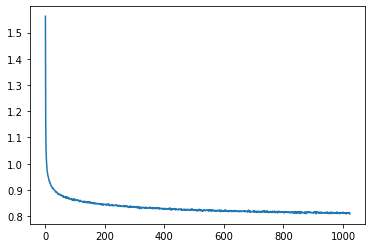

In [14]:
sns.lineplot(range(len(history.history['loss'])), history.history['loss'])

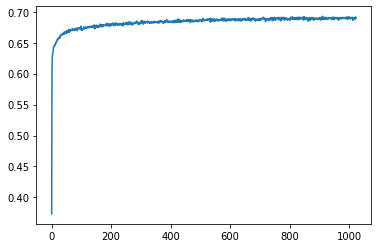

In [15]:
sns.lineplot(range(len(history.history['categorical_accuracy'])), history.history['categorical_accuracy'])

In [ ]:
#from tensorflow import keras
#model = keras.models.load_model('./beers_model_pretrained_11_128_64_8__ol_limited_STDSCALED.h5')

In [29]:
scorr = model.evaluate(X_test, y_test_encoded, batch_size=1024)
scorr

12864/12864 [==============================] - 0s 4us/sample - loss: 0.8559 - categorical_accuracy: 0.6835


[0.8558763852759973, 0.68353546]

In [17]:
scorr2 = model.evaluate(X_train, y_train_encoded, batch_size=1024)
scorr2

30015/30015 [==============================] - 0s 3us/sample - loss: 0.7612 - categorical_accuracy: 0.7092


[0.7611941944117072, 0.7092454]

In [18]:
# import Kaggle's test dataset
beers_test_nostyle_df = pd.read_csv('Data/beers_test_nostyle.csv')

In [19]:
beers_test_nostyle_df = beers_test_nostyle_df.drop(['UserId', 'PitchRate', 'Id'], axis=1)

In [20]:
beers_test_nostyle_df.describe()

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency
count,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10347.000000,10713.000000
mean,1.061081,1.014028,6.185279,49.792976,14.197467,65.269112,1.053482,66.488485
std,0.015272,0.005152,1.566792,38.305291,12.911082,14.074515,0.025066,13.786320
min,1.000000,0.999000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.051000,1.011000,5.170000,27.480000,5.360000,60.000000,1.040446,65.000000
50%,1.059000,1.013000,5.930000,41.030000,8.290000,60.000000,1.048000,70.000000
75%,1.068000,1.016000,6.910000,62.910000,17.940000,60.000000,1.058000,75.000000
max,1.233000,1.148000,23.030000,780.090000,108.650000,240.000000,1.500000,100.000000


In [ ]:
# do same transformations on this dataset
beers_test_nostyle_df.loc[beers_test_nostyle_df["ABV"] >24. , ["ABV"]] = 24. 
beers_test_nostyle_df.loc[beers_test_nostyle_df["IBU"] >500. , ["IBU"]] = 500. 
beers_test_nostyle_df.loc[beers_test_nostyle_df["Color"] >40. , ["Color"]] = 40. 
beers_test_nostyle_df.loc[beers_test_nostyle_df["OG"] >1.5 , ["OG"]] = 1.5
beers_test_nostyle_df.loc[beers_test_nostyle_df["FG"] >1.16 , ["FG"]] = 1.16

In [22]:
# filling NAs 
beers_test_nostyle_df['BoilGravity'] = beers_test_nostyle_df['BoilGravity'].fillna(boil_gravity_mean)

In [23]:
# standarisation
beers_test_nostyle_df = scaler_train.transform(beers_test_nostyle_df)

In [24]:
beers_test_nostyle_df = pd.DataFrame(beers_test_nostyle_df, columns=beers_df.columns.values)
beers_test_nostyle_df.head()

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency
0,-0.891121,-0.586663,-0.957273,-0.861641,1.166953,-0.364851,-0.816214,0.620934
1,0.217140,-0.008694,0.356905,-0.277662,0.423787,1.874953,-0.425820,-0.814532
2,1.150413,1.147246,1.110534,0.468372,2.184453,-0.364851,0.550166,0.405614
3,-0.424485,-0.394007,-0.440321,-0.293134,1.984010,-0.364851,-0.347741,0.979800
4,-1.007780,-1.164633,-0.938588,-0.470661,-0.507081,-0.364851,-0.386780,-2.249997


In [25]:
preds_sumbit = model.predict(beers_test_nostyle_df)

In [26]:
# convert predictions into *.csv like format
preds_sumbit_array = [['Id', 'Style']]

for pred in range(len(preds_sumbit)):
    index = np.argmax(preds_sumbit[pred])
    preds_sumbit_array.append([pred,np.array(encoder.categories_).reshape(-1,1)[index][0]])

[['Id', 'Style'],
 [0, 'Porter'],
 [1, 'Ale'],
 [2, 'Stout'],
 [3, 'Stout'],
 [4, 'Ale'],
 [5, 'IPA'],
 [6, 'IPA'],
 [7, 'Ale'],
 [8, 'Ale'],
 [9, 'IPA'],
 [10, 'IPA'],
 [11, 'IPA'],
 [12, 'Ale'],
 [13, 'IPA'],
 [14, 'Stout'],
 [15, 'IPA'],
 [16, 'IPA'],
 [17, 'IPA'],
 [18, 'IPA'],
 [19, 'IPA'],
 [20, 'Ale'],
 [21, 'Stout'],
 [22, 'Porter'],
 [23, 'IPA'],
 [24, 'Stout'],
 [25, 'Ale'],
 [26, 'Ale'],
 [27, 'Ale'],
 [28, 'Ale'],
 [29, 'Stout'],
 [30, 'Stout'],
 [31, 'IPA'],
 [32, 'Stout'],
 [33, 'Lager'],
 [34, 'IPA'],
 [35, 'Ale'],
 [36, 'Ale'],
 [37, 'Ale'],
 [38, 'Ale'],
 [39, 'IPA'],
 [40, 'IPA'],
 [41, 'Ale'],
 [42, 'IPA'],
 [43, 'Stout'],
 [44, 'Ale'],
 [45, 'Witbier'],
 [46, 'IPA'],
 [47, 'Saison'],
 [48, 'Ale'],
 [49, 'IPA'],
 [50, 'Ale'],
 [51, 'Witbier'],
 [52, 'Lager'],
 [53, 'Ale'],
 [54, 'Ale'],
 [55, 'Stout'],
 [56, 'Stout'],
 [57, 'IPA'],
 [58, 'Ale'],
 [59, 'Stout'],
 [60, 'IPA'],
 [61, 'IPA'],
 [62, 'IPA'],
 [63, 'Stout'],
 [64, 'IPA'],
 [65, 'Witbier'],
 [66, 'Ale'],
 [6

In [ ]:
# save predictions into *.csv file
#np.savetxt("predictions_test1.csv",preds_sumbit_array, delimiter="," )
with open('my_submission_1.csv', 'w+') as file:
    for row in preds_sumbit_array:
            file.write('{0},{1}\n'.format(row[0],row[1]))

In [ ]:
model.save('beers_model_pretrained_1.h5')